In [6]:
import sys
sys.path.append(r'C:\Users\LUV\T\Functions')
from Algorithm_Functions import main_function

import tkinter as tk
from tkinter import ttk, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from PIL import ImageTk, Image

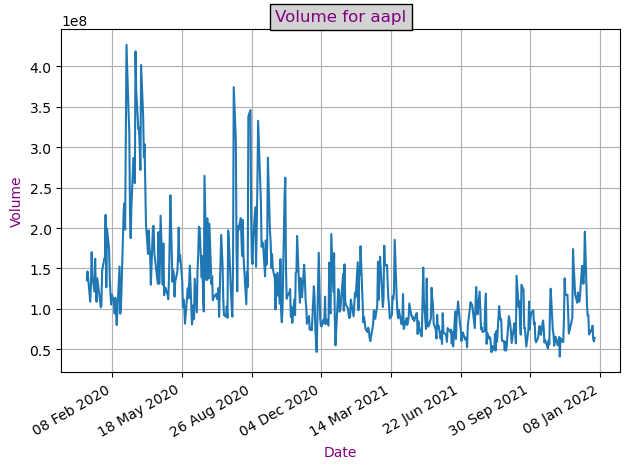

In [7]:
class GUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Stock Analysis")

        self.create_input_fields()
        self.create_submit_button()
        self.create_result_labels()
        self.create_dataframe_button()
        self.create_plot_controls()

    def create_input_fields(self):
        ttk.Label(self.root, text="Ticker Symbol:").grid(column=0, row=0)
        self.ticker_entry = ttk.Entry(self.root)
        self.ticker_entry.grid(column=1, row=0)

        ttk.Label(self.root, text="Start Date (YYYY-MM-DD):").grid(column=0, row=1)
        self.start_date_entry = ttk.Entry(self.root)
        self.start_date_entry.grid(column=1, row=1)

        ttk.Label(self.root, text="End Date (YYYY-MM-DD):").grid(column=0, row=2)
        self.end_date_entry = ttk.Entry(self.root)
        self.end_date_entry.grid(column=1, row=2)

    def create_submit_button(self):
        ttk.Button(self.root, text="Submit", command=self.on_submit).grid(column=1, row=3)

    def create_result_labels(self):
        self.investment_label = ttk.Label(self.root, text="Investment: ")
        self.investment_label.grid(column=0, row=4)

        self.profit_label = ttk.Label(self.root, text="Profit: ")
        self.profit_label.grid(column=0, row=5)

        self.percentage_return_label = ttk.Label(self.root, text="Return : ")
        self.percentage_return_label.grid(column=0, row=6)

    def create_dataframe_button(self):
        ttk.Button(self.root, text="Display DataFrame", command=self.display_dataframe).grid(column=1, row=4)

    def create_plot_controls(self):
        ttk.Label(self.root, text="Select data to plot:").grid(column=0, row=7)
        data_options = ['Closing Price', 'Volume', 'Price Change']
        self.data_dropdown = ttk.Combobox(self.root, values=data_options)
        self.data_dropdown.grid(column=1, row=7)

        ttk.Button(self.root, text="Plot Data", command=self.plot_data).grid(column=1, row=8)

    def on_submit(self):
        ticker = self.ticker_entry.get()
        start_date = self.start_date_entry.get()
        end_date = self.end_date_entry.get()

        try:
            df, investment, profit, percentage_return = main_function(ticker, start_date, end_date)
            self.investment_label.config(text=f"Investment: {investment:.2f}")
            self.profit_label.config(text=f"Profit: {profit:.2f}")
            self.percentage_return_label.config(text=f"Return : {percentage_return:.2f} %")
        except Exception as e:
            messagebox.showerror("Error", f"Could not load data: {str(e)}")

    def display_dataframe(self):
        ticker = self.ticker_entry.get()
        start_date = self.start_date_entry.get()
        end_date = self.end_date_entry.get()

        try:
            df, _, _, _ = main_function(ticker, start_date, end_date)

            df_window = tk.Toplevel(self.root)
            df_window.title("Stock Data")

            df_text = tk.Text(df_window)
            df_text.pack()

            df_text.insert(tk.END, df.to_string())
        except Exception as e:
            messagebox.showerror("Error", f"Could not display DataFrame: {str(e)}")

    def plot_data(self):
        ticker = self.ticker_entry.get()
        start_date = self.start_date_entry.get()
        end_date = self.end_date_entry.get()

        try:
            df, _, _, _ = main_function(ticker, start_date, end_date)
            selected_data = self.data_dropdown.get()

            fig, ax = plt.subplots()

            if selected_data == 'Closing Price':
                ax.plot(df['Date'], df['Close'])
            elif selected_data == 'Volume':
                ax.plot(df['Date'], df['Volume'])
            elif selected_data == 'Price Change':
                ax.plot(df['Date'][:-1], np.diff(df['Close']))

            date_format = mdates.DateFormatter('%d %b %Y')
            ax.xaxis.set_major_formatter(date_format)
            fig.autofmt_xdate()
            ax.set_title(f"{selected_data} for {ticker}", color='#800080',
                         bbox=dict(facecolor='lightgrey', edgecolor='black'))
            ax.set_xlabel('Date', color='#800080')
            ax.set_ylabel(f"{selected_data}", color='#800080')
            fig.tight_layout()
            ax.grid(True)

            canvas = FigureCanvasTkAgg(fig, master=self.root)
            canvas.draw()
            canvas.get_tk_widget().grid(column=2, row=1, rowspan=5, padx=10, pady=10)
        except Exception as e:
            messagebox.showerror("Error", f"Could not plot data: {str(e)}")


if __name__ == "__main__":
    root = tk.Tk()
    app = GUI(root)
    root.mainloop()
